# **Titanic**
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.



# **Objective**

By analyzing the data from the Titanic disaster, I plan to examine if there are gender and class-based differences in the likelihood of survival. 
Specifically, 

**Do women have a greater chance of survival than men?**

**Do 1st-class passengers have a higher rate of survival than those in other classes?** 

By understanding the influence of gender and class on survival, we can gain insight into the societal norms of the time and their effects on people's chances of survival. This analysis may also inform current-day practices for prioritizing safety in emergency situations.

### Data Dictionary

Here is a data dictionary to understand the data, which is available [here](https://www.kaggle.com/c/titanic/data) as well.

| Feature Name | Definition | Key |
| ------------ | ---------- | --- |
| survival | _Passenger survived or not_ | __0 = No, 1 = Yes__ |
| pclass | _Ticket Class_ | __1 = 1st, 2 = 2nd, 3 = 3rd__ |
| name | _Name of the passenger_ | ... | 
| sex | _Gender of the passenger_ | __male, female__ |
| age | _Age in Years_ | ... |
| sibsp | _# of siblings / spouses aboard the Titanic_ | ... |
| parch | _# of parents / children aboard the Titanic_ | ... |
| ticket | _Ticket number_ | ... |
| fare | _Passenger fare paid_ | ... |
| cabin | _Cabin number_ | ... |
| embarked | _Port of Embarkation_ | __C = Cherbourg, Q = Queenstown, S = Southampton__ |

There are some additional notes for these variables that maybe helpful:

- __pclass__: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- __age__: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

- __sibsp__: This feature defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- __parch__: This feature defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

# Dataset Overview

In [42]:
# importing requried python packages
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [43]:
## Write your code to load the data
data = 'https://raw.githubusercontent.com/SindhuraGopalaRao/Exploratory-Data-Analysis-with-Python/main/titanic/titanic.csv'
titanic = pd.read_csv(data, sep=',')

In [44]:
# looking at the few rows of the source data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dataset Exploration

In [45]:
# understanding the basic information of the data

def all_about_data(titanic):
    print("Some basic information about the data:\n")

    #shape of the dataframe
    print("Number of rows:",titanic.shape[0])
    print("Number of columns:",titanic.shape[1])

    #List column names
    print("\nColumn Names:")
    print(titanic.columns)

    #data types for each column in the dataframe
    print("\nDatatype of each columns:")
    print("Dataypes:",titanic.dtypes)

    #summary stats
    print("\nSummary Stats:")
    print(titanic.describe())

    #missing value inspection
    print("\nMissing Values:")
    print(titanic.isna().sum())

all_about_data(titanic)

Some basic information about the data:

Number of rows: 891
Number of columns: 12

Column Names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Datatype of each columns:
Dataypes: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Stats:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000   

### Data Cleaning

In [46]:
# finding the count of missing values in each column
titanic.isna().mean().round(4) * 100 

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [47]:
#copying the dataset
titanic_df = titanic.copy()

Drop the column/feature if more than __50%__ of data is  missing

In [48]:
# dropping the 'Cabin' column from the dataset
titanic_df.drop(['Cabin'], axis=1, inplace=True)

If a column contains less that __50%__ missing then impute it.
- If the feature is __continuous__, use the _mean/median_;
- If it is __categorical__, then _mode_.


In [49]:
# filling the missing values in 'Age' column with mean value
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [50]:
# filling the missing values in 'Embarked' column with mode value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [51]:
# finding the count of missing values in each column
titanic_df.isna().mean().round(4) * 100 

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [52]:
## All data types are correct.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
## shows the generic descriptive statistics, such as mean, median, # of unique values, standard deviation
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### how many passengers were able to survive this tragedy? 

This question can help in understand the magnitude of the disaster and the potential for survival in such a devastating event. By looking at the percentage of passengers that survived, we can gain insight into the kinds of decisions and actions that can lead to survival. 

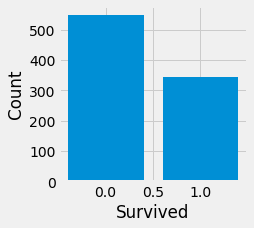

In [54]:
#visualizing the survived count
survived = titanic_df['Survived'].value_counts()
plt.figure(figsize=(3,3))
plt.bar(survived.index, survived.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

 
This bar chart shows the comparison between the number of passengers who survived and the number of passengers who did not survive. We can see that 549 passengers did not survive and 342 passengers did survive.



### What is the gender distribution of my data set?

It is important to understand the gender distribution of a data set in order to gain insights into how different groups of people are represented and potentially affected by the results of any analysis. Knowing the gender distribution can help to identify any potential biases and inform further research to ensure accuracy and fairness.

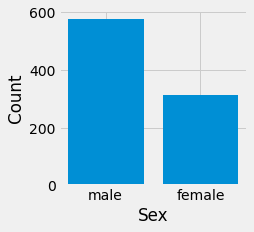

In [55]:
## comparision between male and female passengers

sex = titanic_df['Sex'].value_counts()
plt.figure(figsize=(3,3))
plt.bar(sex.index, sex.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


This bar chart shows the comparison between the number of male and female passengers. We can see that 577 passengers were male and 314 passengers were female.


### Different classes?
It is important to analyze the distribution of different classes in order to understand how they are represented in the data set. 

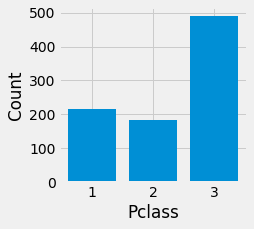

In [56]:
## visulaizing the distribution of different classes
pclass = titanic_df['Pclass'].value_counts()
plt.figure(figsize=(3,3))
plt.bar(pclass.index, pclass.values)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

This bar chart shows the comparison between the number of passengers in each class. We can see that 491 passengers were in class 3, 216 passengers were in class 1, and 184 passengers were in class 2.

### How is age distributed?

Looking at the age distribution of the passengers may also be useful.

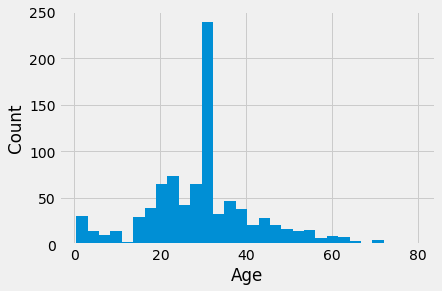

In [57]:
## visulaization of the age distribution of the passengers
plt.hist(titanic_df['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


This histogram shows the age distribution of the passengers. We can see that the majority of the passengers were between the ages of 20 and 30.

### How is fare distributed?

Looking at the fare distribution of the passengers may also be useful.

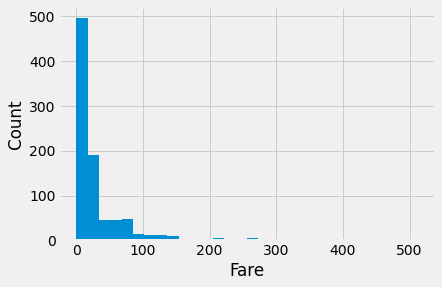

In [58]:
## Write your code here
#source_data['Fare'].plot(kind='hist')

plt.hist(titanic_df['Fare'], bins=30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

This histogram shows the fare distribution of the passengers. We can see that the majority of the passengers paid fares between 0 and 20.

## Feature Transformation/Creation

In your analysis, we may need to create some addtional features/columns to further support it. 

Here, we are going to create a few features.

### Creating age group

In [59]:
# Create new column Age_group

def age_group(age):
    if age < 21:
        return 'child'
    elif age > 60:
        return 'elder'
    else:
        return 'adult'

In [60]:
titanic_df['Age_group'] = titanic_df['Age'].apply(age_group)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,child


### Did passengers travelled alone or with a family?

In this dataset, we have two features modeling _family_: `sibsp` and `parch`. Maybe in the analysis we only care about if the passenger is traveling alone or not.


In [61]:
# Create new column family
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,0


In [62]:
# Create new column travel_alone
def travel_alone(family):
    if family == 0:
        return 'alone'
    else:
        return 'family'


In [63]:
titanic_df['Travel_Alone'] = titanic_df['Family'].apply(travel_alone)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Family,Travel_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,1,family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,1,family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,0,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,1,family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,0,alone


## Answering the Analytical Question


<AxesSubplot:xlabel='Sex'>

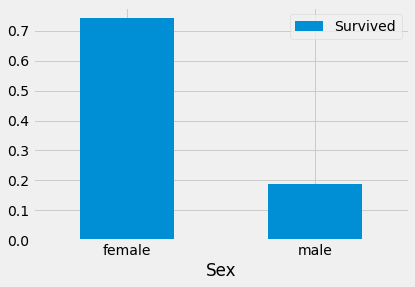

In [64]:
# sex vs. survived
titanic_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot(kind='bar', rot = 0)

<AxesSubplot:xlabel='Sex,Survived'>

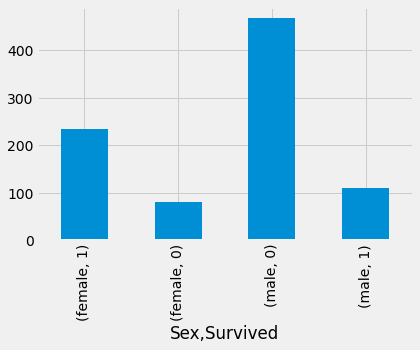

In [65]:
# sex vs. survived
titanic_df.groupby('Sex')['Survived'].value_counts().plot(kind='bar')



Based on above visualization, it is clear that the _survival rate_ of _female_ passengers are much higher (>70%). 

Also, it is clear that in terms of the absolute number, female passengers survived more than male ones, despite the larger number of male passengers on the Titanic.

These findings possibly suggest that the passengers on the Titanic are very __chivalrous__.

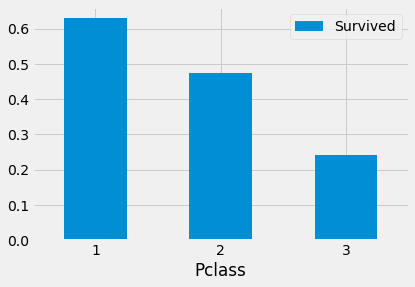

In [ ]:
#We can also look at the survival rate based on the passenger class.

#Passenger class vs survived

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot(kind='bar', rot = 0)

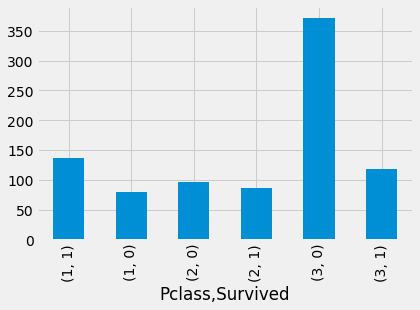

In [ ]:
#Passenger class vs survived

titanic_df.groupby('Pclass')['Survived'].value_counts().plot(kind='bar')


Based on the above visualizations, it is clear that the survival rate of passengers in class 1 is much higher than passengers in class 3.

These findings possibly suggest that passengers in higher classes had a better chance of survival than passengers in lower classes.

### Next Steps

Based on my analysis, a natural next step would be to look into the relationship between the passenger's class and their chances of surviving. Create a visualization comparing the survival rates of passengers in each class to see if there was a correlation between the two and also look at the relationship between the fare the passenger paid and their chances of surviving to see if there was a correlation. Finally, look at the relationship between the passenger's age and their chances of surviving to see if there was a correlation between the two.